<a href="https://colab.research.google.com/github/pabloisaiahs/DS-4002-proj2-MI3/blob/main/SCRIPTS/approval_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-910e227eb9e3>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_presidents))


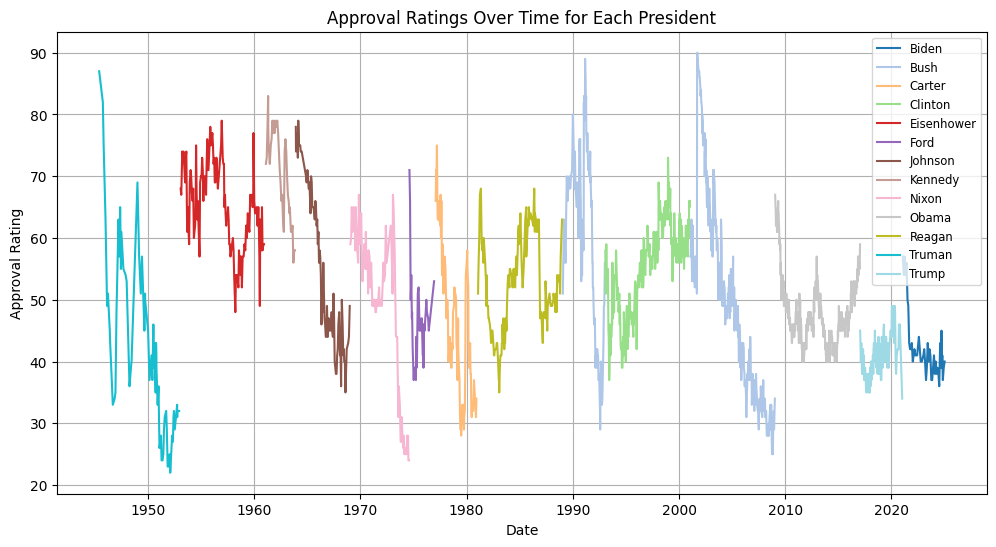

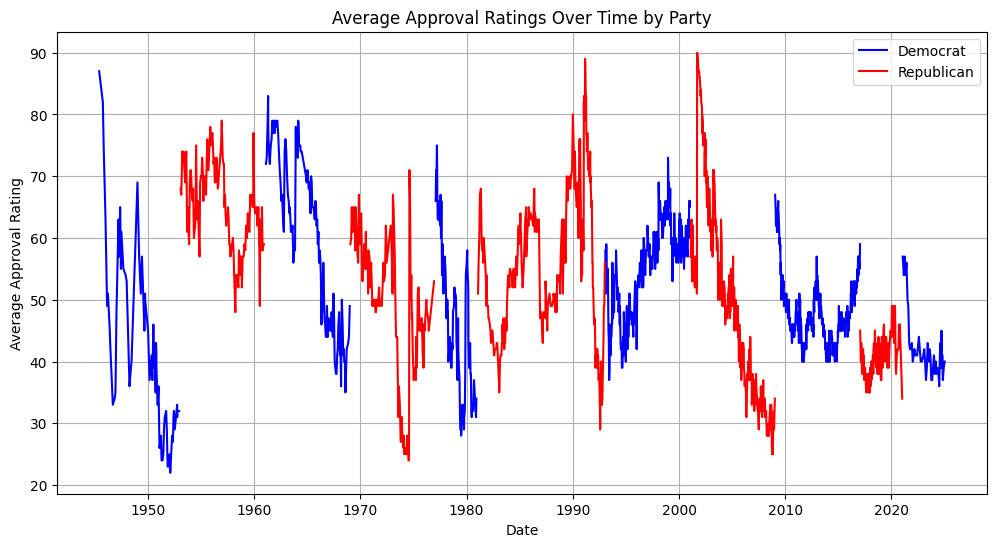

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load and clean the data
# -------------------------------
# Load the cleaned CSV file
df = pd.read_csv("approval_ratings_clean.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove duplicate rows so duplicate points do not get connected
df.drop_duplicates(subset=["President", "Date", "Approval"], inplace=True)

# -------------------------------
# Graph 1: Approval Ratings Over Time for Each President
# -------------------------------
# Define a threshold (in days) to break the line when there is a large gap (e.g., between non-contiguous terms)
threshold = 365  # adjust as needed

# Get a sorted list of unique presidents
unique_presidents = sorted(df['President'].unique())

# Create a colormap with a unique color for each president
cmap = plt.cm.get_cmap('tab20', len(unique_presidents))

plt.figure(figsize=(12,6))
for i, president in enumerate(unique_presidents):
    # Filter and sort data for the president
    group = df[df['President'] == president].sort_values(by='Date')

    # Break the group into segments based on the threshold gap
    segments = []
    current_segment = []
    previous_date = None
    for idx, row in group.iterrows():
        if previous_date is None:
            current_segment.append(row)
        else:
            gap = (row['Date'] - previous_date).days
            if gap > threshold:
                segments.append(pd.DataFrame(current_segment))
                current_segment = []
            current_segment.append(row)
        previous_date = row['Date']
    if current_segment:
        segments.append(pd.DataFrame(current_segment))

    # Plot each segment; only label the first segment to avoid duplicate legend entries.
    first_segment = True
    for seg in segments:
        if first_segment:
            plt.plot(seg['Date'], seg['Approval'], label=president, color=cmap(i))
            first_segment = False
        else:
            plt.plot(seg['Date'], seg['Approval'], color=cmap(i))

plt.xlabel("Date")
plt.ylabel("Approval Rating")
plt.title("Approval Ratings Over Time for Each President")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.show()

# -------------------------------
# Graph 2: Average Approval Ratings Over Time by Party
# -------------------------------
# Define mapping from President to Party.
party_map = {
    "Truman": "Democrat",
    "Eisenhower": "Republican",
    "Kennedy": "Democrat",
    "Johnson": "Democrat",
    "Nixon": "Republican",
    "Ford": "Republican",
    "Carter": "Democrat",
    "Reagan": "Republican",
    "Bush": "Republican",  # Adjust if needed (for differentiating Bush Sr. vs. Bush Jr.)
    "Clinton": "Democrat",
    "Obama": "Democrat",
    "Biden": "Democrat",
    "Trump": "Republican"
}

# Map each president to their party.
df["Party"] = df["President"].map(party_map)

# Group data by Date and Party and compute the average approval rating.
df_party = df.groupby(["Date", "Party"])["Approval"].mean().reset_index()

# Define colors for each party.
party_colors = {"Democrat": "blue", "Republican": "red"}

plt.figure(figsize=(12,6))
# Process each party group and break into segments if necessary.
for party in df_party['Party'].unique():
    group = df_party[df_party['Party'] == party].sort_values(by="Date")

    segments = []
    current_segment = []
    previous_date = None
    for idx, row in group.iterrows():
        if previous_date is None:
            current_segment.append(row)
        else:
            gap = (row['Date'] - previous_date).days
            if gap > threshold:
                segments.append(pd.DataFrame(current_segment))
                current_segment = []
            current_segment.append(row)
        previous_date = row['Date']
    if current_segment:
        segments.append(pd.DataFrame(current_segment))

    # Plot each segment without markers (plain lines) and only label the first segment.
    first_segment = True
    for seg in segments:
        if first_segment:
            plt.plot(seg['Date'], seg['Approval'], label=party, color=party_colors.get(party, "black"))
            first_segment = False
        else:
            plt.plot(seg['Date'], seg['Approval'], color=party_colors.get(party, "black"))

plt.xlabel("Date")
plt.ylabel("Average Approval Rating")
plt.title("Average Approval Ratings Over Time by Party")
plt.legend(loc="best")
plt.grid(True)
plt.show()
